In [3]:
# COMP 4630 - Final Project
# Group: Alex Pham, Matt Manolov, Zakie Shah
# Due date: April 27, 2025

In [4]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split

In [7]:
# Step 1: Load the original raw data with no header and semicolon delimiter
raw_df = pd.read_csv("data/data.csv", sep=';', header=None)

# Step 2: Extract the first row as column names
new_header = raw_df.iloc[0]      # Get the first row as header
clean_df = raw_df[1:]            # Remove the first row from the data
clean_df.columns = new_header    # Assign new header

# Step 3: Reset the index and convert all values to string (to match reference format)
clean_df.reset_index(drop=True, inplace=True)
clean_df = clean_df.astype(str)

# Optional: Save the cleaned data
clean_df.to_csv("data/CleanedData.csv", index=False)

# Done — preview the cleaned DataFrame
print(clean_df.head())


0 Marital status Application mode Application order Course  \
0              1               17                 5    171   
1              1               15                 1   9254   
2              1                1                 5   9070   
3              1               17                 2   9773   
4              2               39                 1   8014   

0 Daytime/evening attendance\t Previous qualification  \
0                            1                      1   
1                            1                      1   
2                            1                      1   
3                            1                      1   
4                            0                      1   

0 Previous qualification (grade) Nacionality Mother's qualification  \
0                          122.0           1                     19   
1                          160.0           1                      1   
2                          122.0           1                     37   


In [ ]:
# load the clean data 
df = pd.read_csv("data/CleanedData.csv")
df.columns = df.columns.str.strip()

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [15]:
# data exploration

# Convert columns to numeric types
df["Age at enrollment"] = pd.to_numeric(df["Age at enrollment"], errors='coerce')
df["Admission grade"] = pd.to_numeric(df["Admission grade"], errors='coerce')
df["Previous qualification (grade)"] = pd.to_numeric(df["Previous qualification (grade)"], errors='coerce')
df["Curricular units 1st sem (grade)"] = pd.to_numeric(df["Curricular units 1st sem (grade)"], errors='coerce')
df["Curricular units 2nd sem (grade)"] = pd.to_numeric(df["Curricular units 2nd sem (grade)"], errors='coerce')
df["Unemployment rate"] = pd.to_numeric(df["Unemployment rate"], errors='coerce')
df["Inflation rate"] = pd.to_numeric(df["Inflation rate"], errors='coerce')
df["GDP"] = pd.to_numeric(df["GDP"], errors='coerce')

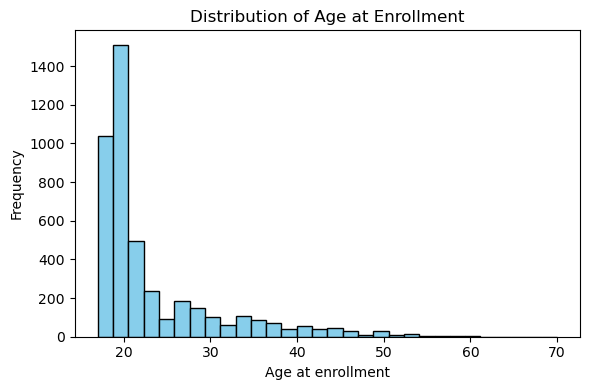

In [ ]:
# age at enrollment

plt.figure(figsize=(6, 4))
plt.hist(df["Age at enrollment"].dropna(), bins=30, color="skyblue", edgecolor="black")
plt.title("Distribution of Age at Enrollment")
plt.xlabel("Age at enrollment")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

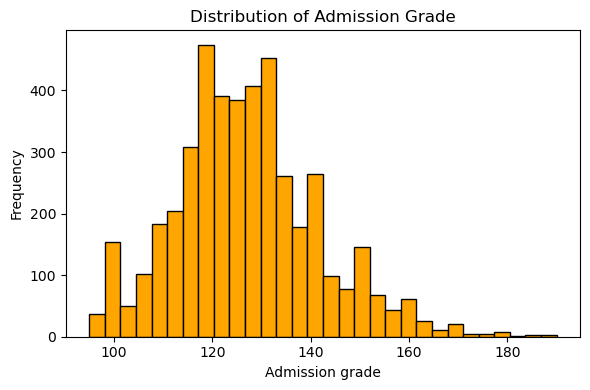

In [ ]:
# admission grade

plt.figure(figsize=(6, 4))
plt.hist(df["Admission grade"].dropna(), bins=30, color="orange", edgecolor="black")
plt.title("Distribution of Admission Grade")
plt.xlabel("Admission grade")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


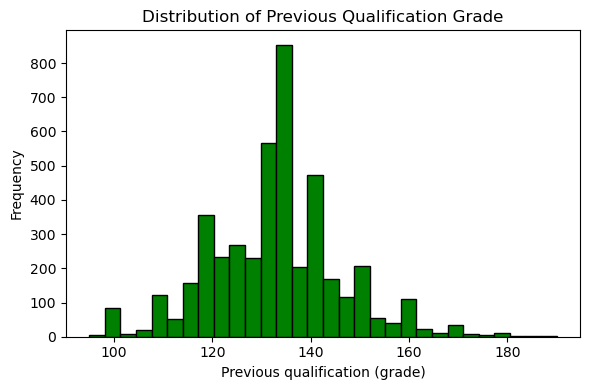

In [ ]:
# previous qualification (grade)

plt.figure(figsize=(6, 4))
plt.hist(df["Previous qualification (grade)"].dropna(), bins=30, color="green", edgecolor="black")
plt.title("Distribution of Previous Qualification Grade")
plt.xlabel("Previous qualification (grade)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

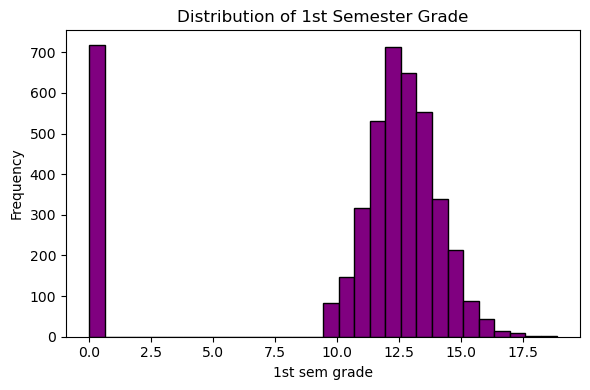

In [ ]:
# first semester grade

plt.figure(figsize=(6, 4))
plt.hist(df["Curricular units 1st sem (grade)"].dropna(), bins=30, color="purple", edgecolor="black")
plt.title("Distribution of 1st Semester Grade")
plt.xlabel("1st sem grade")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

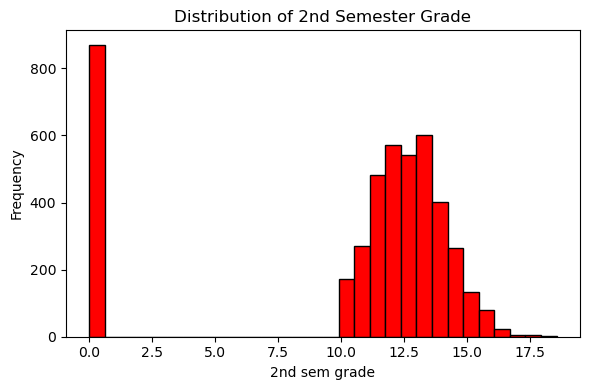

In [ ]:
# second semester grade

plt.figure(figsize=(6, 4))
plt.hist(df["Curricular units 2nd sem (grade)"].dropna(), bins=30, color="red", edgecolor="black")
plt.title("Distribution of 2nd Semester Grade")
plt.xlabel("2nd sem grade")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

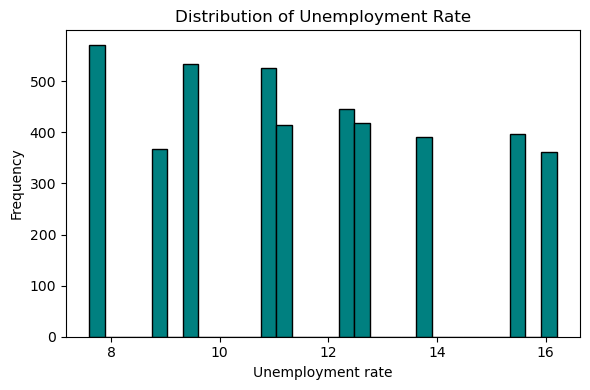

In [ ]:
# unemployment rate

plt.figure(figsize=(6, 4))
plt.hist(df["Unemployment rate"].dropna(), bins=30, color="teal", edgecolor="black")
plt.title("Distribution of Unemployment Rate")
plt.xlabel("Unemployment rate")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

<Figure size 600x400 with 0 Axes>

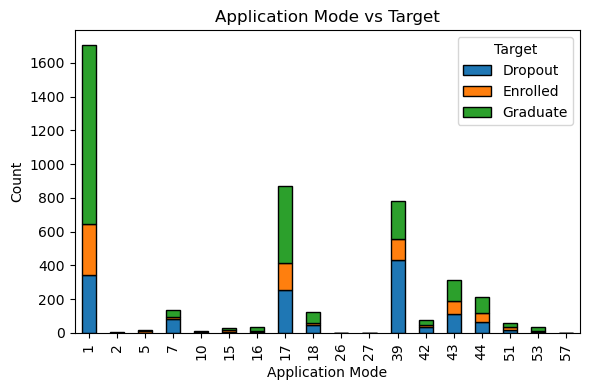

<Figure size 600x400 with 0 Axes>

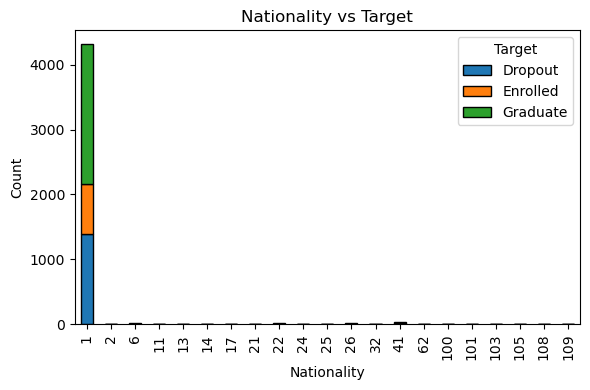

In [23]:
# === 4. Application Mode & Nationality ===
plt.figure(figsize=(6, 4))
pd.crosstab(df["Application mode"], df["Target"]).plot(
    kind='bar', stacked=True, figsize=(6,4), edgecolor="black"
)
plt.title("Application Mode vs Target")
plt.xlabel("Application Mode")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 4))
pd.crosstab(df["Nacionality"], df["Target"]).plot(
    kind='bar', stacked=True, figsize=(6,4), edgecolor="black"
)
plt.title("Nationality vs Target")
plt.xlabel("Nationality")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

<Figure size 600x400 with 0 Axes>

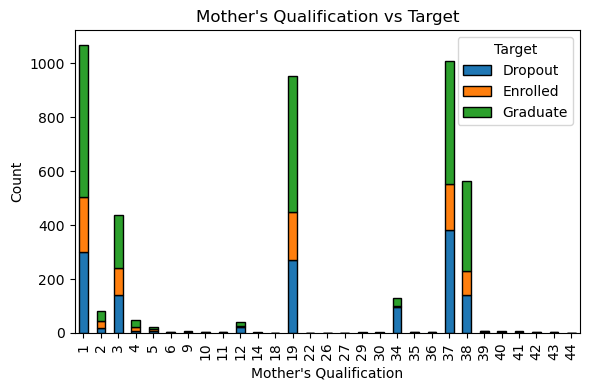

<Figure size 600x400 with 0 Axes>

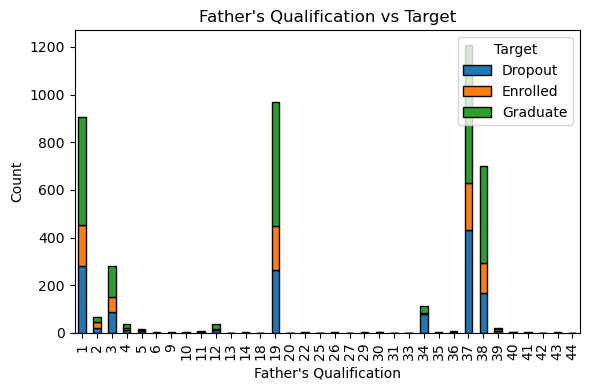

In [24]:
# === 3. Parental Qualification vs Target ===
plt.figure(figsize=(6, 4))
pd.crosstab(df["Mother's qualification"], df["Target"]).plot(
    kind='bar', stacked=True, figsize=(6,4), edgecolor="black"
)
plt.title("Mother's Qualification vs Target")
plt.xlabel("Mother's Qualification")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 4))
pd.crosstab(df["Father's qualification"], df["Target"]).plot(
    kind='bar', stacked=True, figsize=(6,4), edgecolor="black"
)
plt.title("Father's Qualification vs Target")
plt.xlabel("Father's Qualification")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [ ]:
# maybe some feature engineering?
# idk what to do for the 0s and whatever 